In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..", "..")))

# Retro hotspotting

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import open_cp.scripted
import open_cp.scripted.analysis as analysis

In [3]:
loaded = open_cp.scripted.Loader("retro_preds.pic.xz")

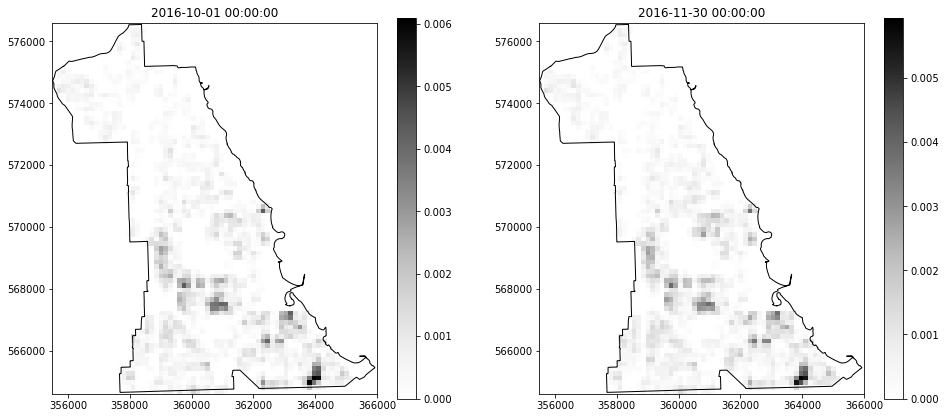

In [4]:
times = [x[1] for x in loaded]
preds = [x[2] for x in loaded]

fig, axes = plt.subplots(ncols=2, figsize=(16,7))
for ax, i in zip(axes, [0, 60]):
    analysis.plot_prediction(loaded, preds[i], ax)
    ax.set_title(times[i])

In [5]:
betas = analysis.hit_counts_to_beta("retro.csv")

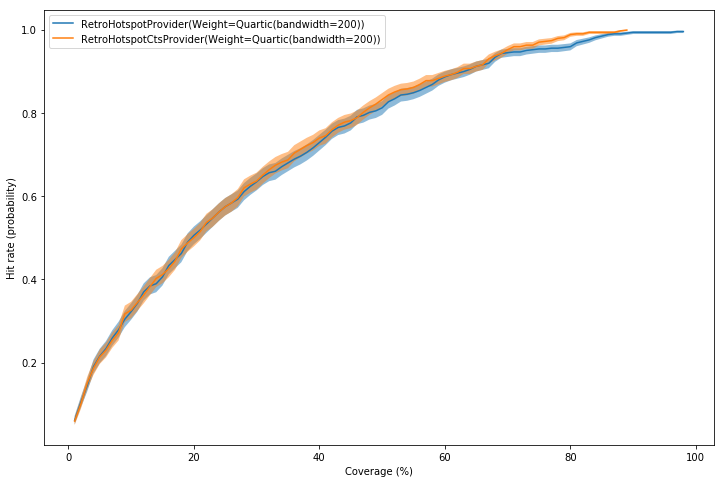

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
analysis.plot_betas(betas, ax)

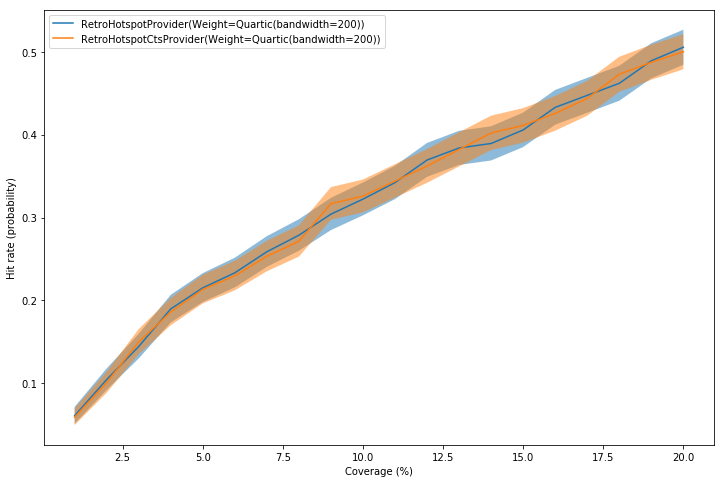

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
analysis.plot_betas(betas, ax, range(1,21))

## Optimising the bandwidth

Originally, I noticed that these results were not _reproducible_.  This was caused by converting from a "continuous" prediction to a grid based prediction, where we carry out a monte carlo integration step (sample the kernel at some smallish number of points in each grid cell, and average).  Apparently this introduces enough noise that you get quite different results.

We now check that running twice gives the same result (because we now sample to a sub-grid).

Result is that it doesn't really seem to matter: 50m seems fine.

In [22]:
all_betas = analysis.hit_counts_to_beta("retro_opt.csv")
all_betas1 = analysis.hit_counts_to_beta("retro_opt1.csv")

In [23]:
sample = [ "RetroHotspotCtsProvider(Weight=Quartic(bandwidth={}))".format(x)
         for x in [50, 100, 150, 200, 250, 300] ]
betas = {k:all_betas[k] for k in sample}
betas1 = {k:all_betas1[k] for k in sample}

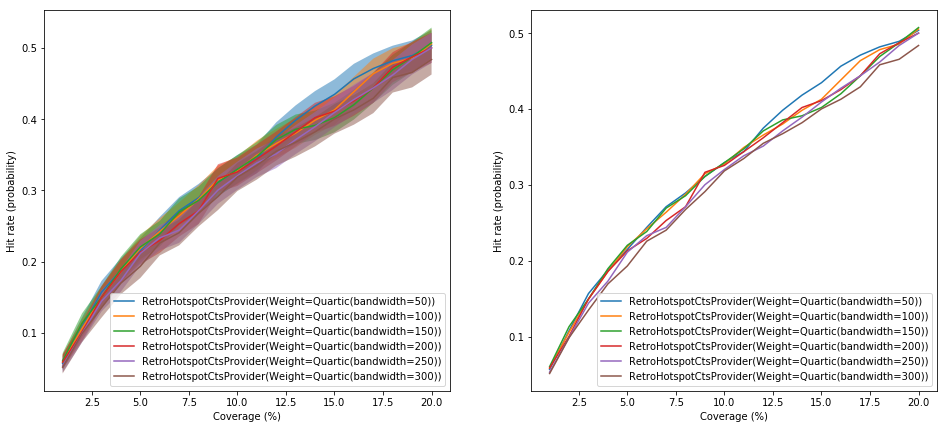

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))
analysis.plot_betas(betas, axes[0], range(1,21))
analysis.plot_betas(betas, axes[1], range(1,21), plot_sds=False)
#for ax in axes:
#    ax.legend([])

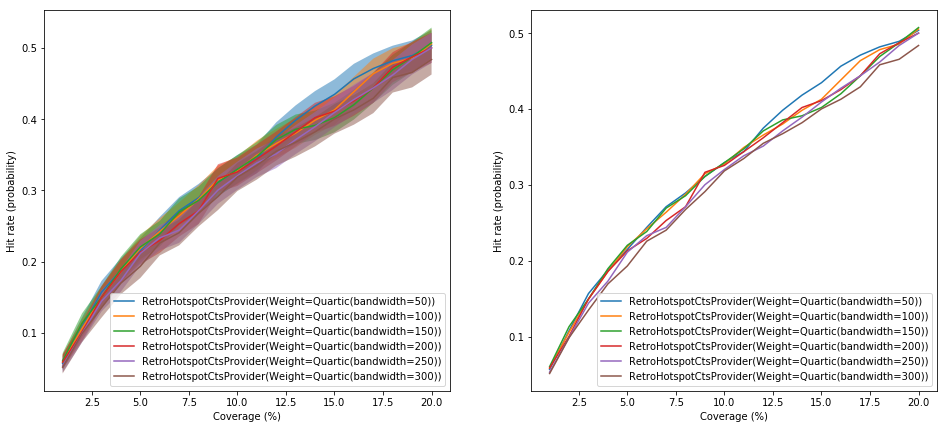

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))
analysis.plot_betas(betas1, axes[0], range(1,21))
analysis.plot_betas(betas1, axes[1], range(1,21), plot_sds=False)
#for ax in axes:
#    ax.legend([])

# Grid based algorithm

150m seems to win.

In [27]:
all_betas = analysis.hit_counts_to_beta("retro_grid_opt.csv")

In [28]:
sample = [ "RetroHotspotProvider(Weight=Quartic(bandwidth={}))".format(x)
         for x in [50, 100, 150, 200, 250, 300] ]
betas = {k:all_betas[k] for k in sample}

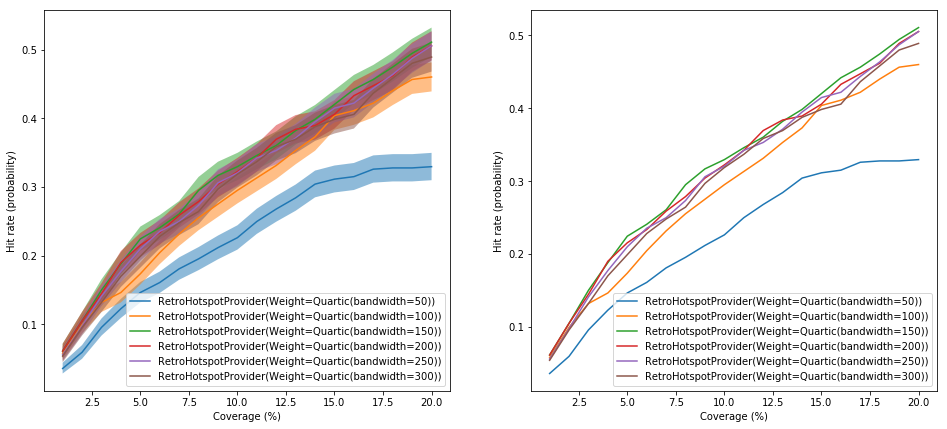

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(16,7))
analysis.plot_betas(betas, axes[0], range(1,21))
analysis.plot_betas(betas, axes[1], range(1,21), plot_sds=False)
#for ax in axes:
#    ax.legend([])

In [30]:
import importlib
importlib.reload(analysis)

<module 'open_cp.scripted.analysis' from '/nfs/see-fs-02_users/matmdpd/Crime Predict Project/PredictCode/open_cp/scripted/analysis.py'>

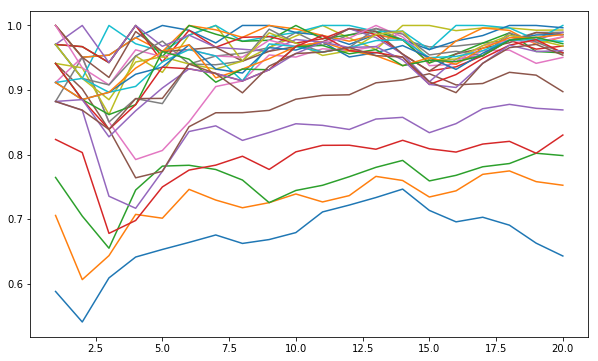

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
normed = analysis.plot_betas_means_against_max(all_betas, ax, range(1,21))
#ax.legend()
None

In [32]:
{key for key in normed if all(x>=0.95 for x in normed[key])}

{'RetroHotspotProvider(Weight=Quartic(bandwidth=150))'}

In [33]:
{key : min(normed[key]) for key in normed}

{'RetroHotspotProvider(Weight=Quartic(bandwidth=100))': 0.76415094339622647,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=110))': 0.79245283018867929,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=120))': 0.85057471264367823,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=130))': 0.86206896551724133,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=140))': 0.91803278688524592,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=150))': 0.95081967213114749,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=160))': 0.94190871369294604,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=170))': 0.94190871369294604,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=180))': 0.9294605809128631,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=190))': 0.91286307053941906,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=200))': 0.91954022988505746,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=210))': 0.90804597701149425,
 'RetroHotspotProvider(Weight=Quartic(bandwidth=220))': 0.90804597701149425,


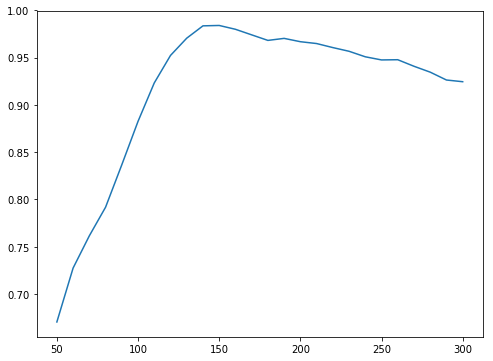

In [40]:
import re
import numpy as np

def label(x):
    m = re.search("width=(\d+)", x)
    return int(m.group(1))

avg = {label(key) : np.mean(normed[key]) for key in normed}

fig, ax = plt.subplots(figsize=(8,6))
x = np.sort(list(avg))
y = [avg[t] for t in x]
ax.plot(x, y)

In [41]:
avg

{50: 0.67034370309238933,
 60: 0.72736646454676845,
 70: 0.7614754082768822,
 80: 0.79172273726792941,
 90: 0.83659813445917008,
 100: 0.88253093445815056,
 110: 0.9231721574114502,
 120: 0.95224934148061302,
 130: 0.97050897441193751,
 140: 0.98355724922268739,
 150: 0.98395696830162294,
 160: 0.97991788174814931,
 170: 0.97403152252215452,
 180: 0.96816016217661949,
 190: 0.97029778457475935,
 200: 0.96678523632342783,
 210: 0.96483641132163755,
 220: 0.96056431701765788,
 230: 0.95665192024384249,
 240: 0.95082192972968171,
 250: 0.94750190809606916,
 260: 0.94772587166669187,
 270: 0.94080244507824651,
 280: 0.93456854834349379,
 290: 0.92626838817772517,
 300: 0.92445979112956422}

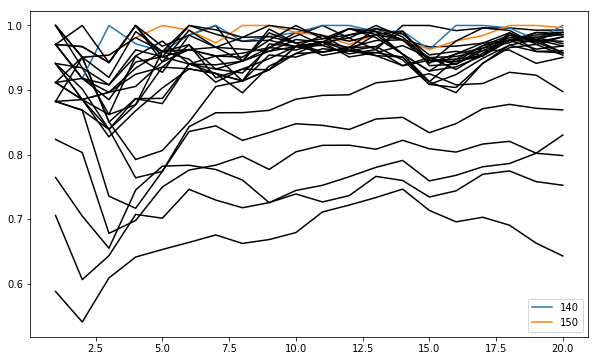

In [42]:
r = normed


highlight = {140, 150}

fig, ax = plt.subplots(figsize=(10,6))
x = list(range(1, 21))
for k in r:
    if label(k) not in highlight:
        ax.plot(x, r[k], color="black", label="_")
    else:
        ax.plot(x, r[k], label=label(k))
ax.legend()
None